<a href="https://colab.research.google.com/github/liskibruh/EDA-on-Average-Temperatures-in-Cities-of-Pakistan/blob/main/Copy_of_Machine_learning_to_predict_survival_of_patients_with_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA SET DETAILS
Source:

Provide the names, email addresses, institutions, and other contact information of the donors and creators of the data set.The original dataset version was collected by Tanvir Ahmad, Assia Munir, Sajjad Haider Bhatti, Muhammad Aftab, and Muhammad Ali Raza (Government College University, Faisalabad, Pakistan) and made available by them on FigShare under the Attribution 4.0 International (CC BY 4.0: freedom to share and adapt the material) copyright in July 2017.

The current version of the dataset was elaborated by Davide Chicco (Krembil Research Institute, Toronto, Canada) and donated to the University of California Irvine Machine Learning Repository under the same Attribution 4.0 International (CC BY 4.0) copyright in January 2020. Davide Chicco can be reached at <davidechicco '@' davidechicco.it>

Data Set Information:

A detailed description of the dataset can be found in the Dataset section of the following paper:

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). 

PAPER LINk: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Tab8



In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart_failure = pd.read_csv('/content/sample_data/S1Data.csv')
print(heart_failure.columns)

Index(['TIME', 'Event', 'Gender', 'Smoking', 'Diabetes', 'BP', 'Anaemia',
       'Age', 'Ejection.Fraction', 'Sodium', 'Creatinine', 'Pletelets', 'CPK'],
      dtype='object')


In [ ]:
heart_failure.head()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [ ]:
heart_failure.tail()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
294,250,0,0,0,1,0,0,45.0,55,132,1.0,543000.0,582
295,244,0,0,0,1,0,0,51.0,40,134,0.9,221000.0,582
296,14,1,1,0,0,0,0,45.0,14,127,0.8,166000.0,582
297,80,0,1,0,1,0,0,60.0,45,133,1.0,297000.0,897
298,16,0,0,0,0,1,1,65.0,25,137,1.3,276000.0,52


In [ ]:
print("heart failure data set dimensions : {}".format(heart_failure.shape))

heart failure data set dimensions : (299, 13)


In [ ]:
heart_failure.groupby('Event').size()

Event
0    203
1     96
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b24d50850>,
      dtype=object)

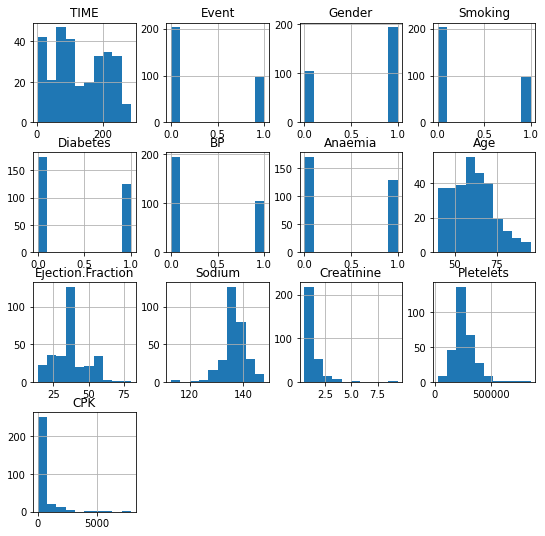

In [ ]:
heart_failure.hist(figsize=(9, 9))

In [ ]:
heart_failure.isnull().sum()

TIME                 0
Event                0
Gender               0
Smoking              0
Diabetes             0
BP                   0
Anaemia              0
Age                  0
Ejection.Fraction    0
Sodium               0
Creatinine           0
Pletelets            0
CPK                  0
dtype: int64

In [ ]:
heart_failure.isna().sum()

TIME                 0
Event                0
Gender               0
Smoking              0
Diabetes             0
BP                   0
Anaemia              0
Age                  0
Ejection.Fraction    0
Sodium               0
Creatinine           0
Pletelets            0
CPK                  0
dtype: int64

In [ ]:
X = heart_failure.iloc[:,1:12]


In [ ]:
y = heart_failure.Event



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier()))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = heart_failure.Event, random_state=0)

In [ ]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.640000
1  SVC  0.680000
2   LR  0.786667
3   DT  1.000000
4  GNB  0.800000
5   RF  1.000000
6   GB  1.000000


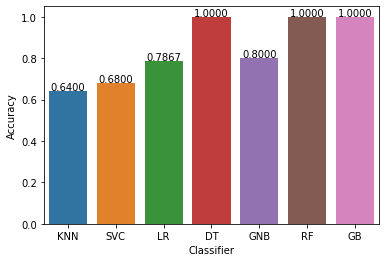

In [ ]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [ ]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=None)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.642069
1  SVC  0.678966
2   LR  0.725632
3   DT  1.000000
4  GNB  0.739195
5   RF  1.000000
6   GB  1.000000


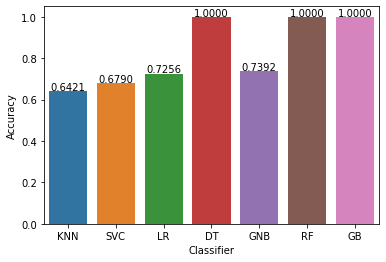

In [ ]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()



In [ ]:
feature_names = ['ejection_fraction', 'serum_creatinine']
X_new = heart_failure[feature_names]
y = heart_failure.Event

KeyError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = heart_failure.Event, random_state=0)

In [ ]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.640000
1  SVC  0.680000
2   LR  0.786667
3   DT  1.000000
4  GNB  0.800000
5   RF  1.000000
6   GB  1.000000


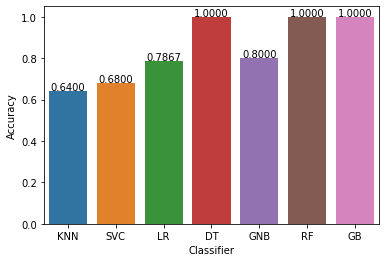

In [ ]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()